In [5]:
from Implementación.BinarySearchTree import BinarySearchTree
from Implementación.BinaryTree import BinaryTree
from Implementación.BNode import BNode
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
# Métodos para dibujar el árbol
def add_edges(root, graph, pos, x=0, y=0, layer=1, dx=1.0, dy=1.0):
    if root is not None:
        pos[root.getData()] = (x, -layer)
        if root.getLeft() is not None:
            graph.add_edge(root.getData(), root.getLeft().getData())
            add_edges(root.getLeft(), graph, pos, x - dx / 2, y - dy, layer + 1, dx / 2, dy)
        if root.getRight() is not None:
            graph.add_edge(root.getData(), root.getRight().getData())
            add_edges(root.getRight(), graph, pos, x + dx / 2, y - dy, layer + 1, dx / 2, dy)


def draw_binary_tree(raiz):
    graph = nx.Graph()
    pos = {}
    graph.add_node(raiz.getData())
    add_edges(raiz, graph, pos)

    options = {
        "node_color": "skyblue",
        "node_size": 1000,
        "with_labels": True,
        "font_size": 10,
        "font_color": "black",
        "font_weight": "bold",
        "width": 2,
    }

    nx.draw(graph, pos, **options)
    plt.show()
    
def add_edges_bst(root, graph, pos, x=0, y=0, layer=1, dx=1.0, dy=1.0):
    if root is not None:
        pos[root.getData().getData()] = (x, -layer)
        if root.getLeft() is not None:
            graph.add_edge(root.getData().getData(), root.getLeft().getData().getData())
            add_edges_bst(root.getLeft(), graph, pos, x - dx / 2, y - dy, layer + 1, dx / 2, dy)
        if root.getRight() is not None:
            graph.add_edge(root.getData().getData(), root.getRight().getData().getData())
            add_edges_bst(root.getRight(), graph, pos, x + dx / 2, y - dy, layer + 1, dx / 2, dy)
    
def draw_binary_search_tree(raiz):
    graph = nx.Graph()
    pos = {}
    graph.add_node(raiz.getData().getData())
    add_edges_bst(raiz, graph, pos)

    options = {
        "node_color": "skyblue",
        "node_size": 1000,
        "with_labels": True,
        "font_size": 10,
        "font_color": "black",
        "font_weight": "bold",
        "width": 2,
    }

    nx.draw(graph, pos, **options)
    plt.show()

# Ejercicio 1
Dado un Arreglo de números ordenado, diseñe un algoritmo recursivo que cree un Árbol de Búsqueda Binario balanceado con los elementos del Arreglo. Su algoritmo debe correr en 𝑂(n), donde n es el número de elementos en el arreglo. (hint: el elemento medio del arreglo debería ser la raíz del árbol)

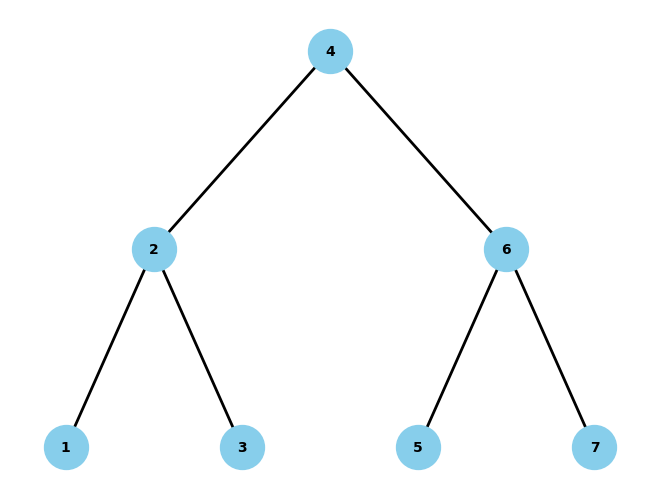

In [23]:
def createBST(arr):
    if len(arr) == 0:
        return None
    else:
        mid = len(arr) // 2
        root = BNode(arr[mid])
        root.setLeft(createBST(arr[:mid]))
        root.setRight(createBST(arr[mid+1:]))
        return root
    
# Ejemplo de uso
arr = [1, 2, 3, 4, 5, 6, 7]
root = createBST(arr)
draw_binary_tree(root)

# Ejercicio 2
Dado un Árbol Binario de Búsqueda y un intervalo [low, high], pode el árbol de modo que todos sus elementos se encuentren en [low, high]. El podado del árbol no debe cambiar la estructura relativa de los elementos que seguirán en el árbol (es decir, cualquier descendiente de un nodo debe seguir siendo descendiente de dicho nodo).

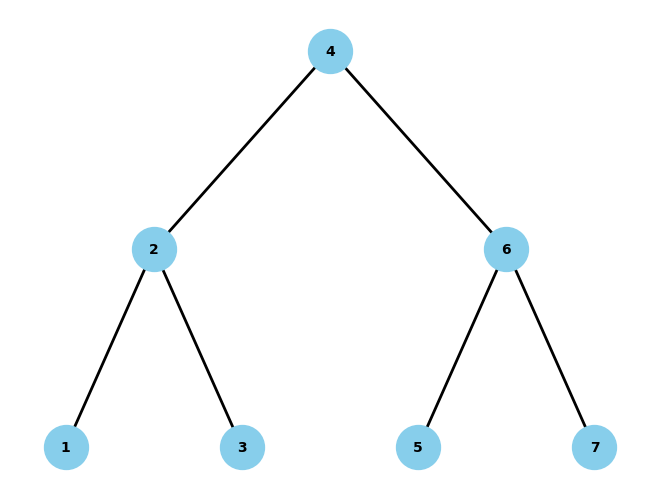

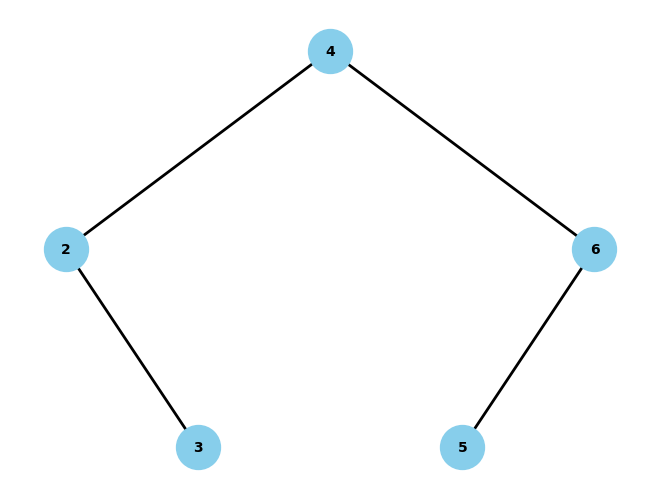

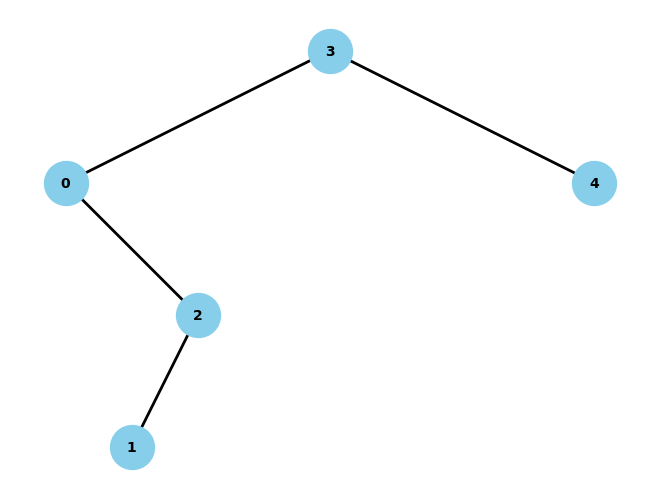

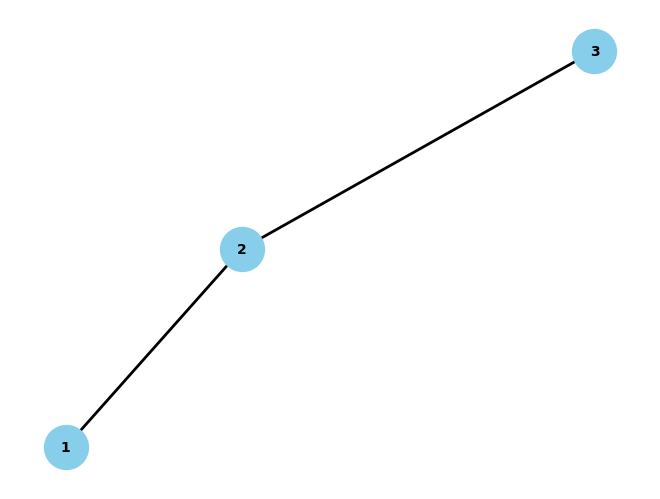

In [36]:
def pruneBST(root, low, high):
    if root is None:
        return None
    else:
        root.setLeft(pruneBST(root.getLeft(), low, high))
        root.setRight(pruneBST(root.getRight(), low, high))
        if root.getData().getData() < low:
            return root.getRight()
        elif root.getData().getData() > high:
            return root.getLeft()
        else:
            return root
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(4, 4)
arbol.insert(2, 2)
arbol.insert(6, 6)
arbol.insert(1, 1)
arbol.insert(3, 3)
arbol.insert(5, 5)
arbol.insert(7, 7)
root = arbol.root()
draw_binary_search_tree(root)
root = pruneBST(root, 2, 6)
draw_binary_search_tree(root)

# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(3, 3)
arbol.insert(0, 0)
arbol.insert(4, 4)
arbol.insert(2, 2)
arbol.insert(1, 1)
root = arbol.root()
draw_binary_search_tree(root)
root = pruneBST(root, 1, 3)
draw_binary_search_tree(root)

# Ejercicio 3
Dado un Árbol Binario de Búsqueda y un intervalo [low, high], diseñe y analice un algoritmo que devuelva la suma de los valores de todos los nodos cuyo valor esté el rango [low, high].

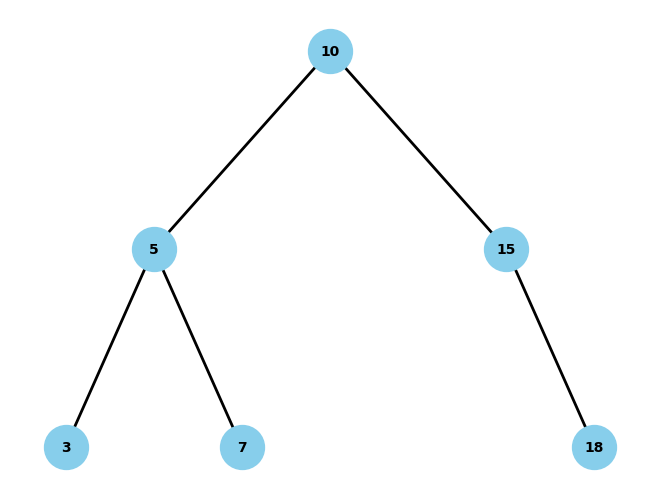

32


In [42]:
def sumBST(root, low, high):
    if root is None:
        return 0
    else:
        if root.getData().getData() < low:
            return sumBST(root.getRight(), low, high)
        elif root.getData().getData() > high:
            return sumBST(root.getLeft(), low, high)
        else:
            return root.getData().getData() + sumBST(root.getLeft(), low, high) + sumBST(root.getRight(), low, high)
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
print(sumBST(root, 7, 15)) # 32

# Ejercicio 4
Resuelva las siguientes preguntas en orden:
1. Dado un Árbol Binario de Búsqueda, cree un algoritmo que balancee este árbol usando las operaciones Left Rotation y Right Rotation vistas en clase. Un árbol binario de búsqueda está balanceado si para todos los nodos, la profundidad de sus dos subárboles nunca difiere en más de 1.
2. Consulte sobre los Árboles AVL, el primer árbol de búsqueda binario auto balanceable que se ideó. Consulte sus operaciones básicas y complejidad de estas.

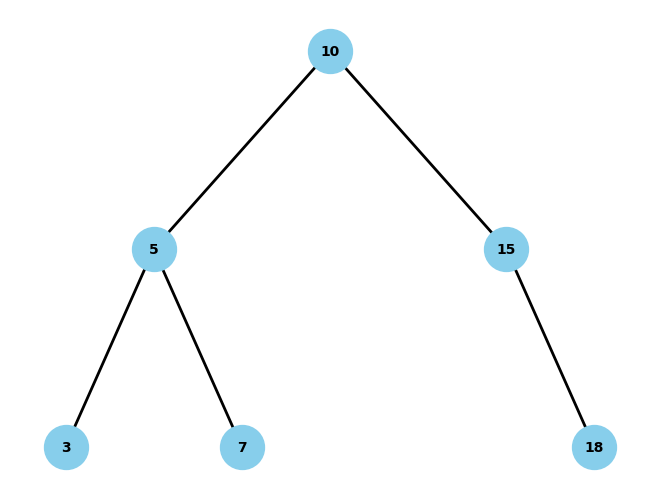

AttributeError: 'NoneType' object has no attribute 'getLeft'

In [46]:
def leftRotation(T, x):
    y = T.right(x)
    T.insertRight(x, T.left(y))
    if T.parent(x) is None:
        T.setRoot(y)
    else:
        if T.left(T.parent(x)) == x:
            T.insertLeft(T.parent(x), y)
        else:
            T.insertRight(T.parent(x), y)
    T.insertLeft(y, x)
    
def rightRotation(T, y):
    x = T.left(y)
    T.insertLeft(y, T.right(x))
    if T.parent(y) is None:
        T.setRoot(x)
    else:
        if T.left(T.parent(y)) == y:
            T.insertLeft(T.parent(y), x)
        else:
            T.insertRight(T.parent(y), x)
    T.insertRight(x, y)

# Solución
def balanceBST(T, x):
    if T.left(x) is not None:
        balanceBST(T, T.left(x))
    if T.right(x) is not None:
        balanceBST(T, T.right(x))
    if T.left(x) is not None and T.right(x) is not None:
        if T.height(T.left(x)) - T.height(T.right(x)) > 1:
            rightRotation(T, x)
        elif T.height(T.right(x)) - T.height(T.left(x)) > 1:
            leftRotation(T, x)
            
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
balanceBST(arbol, root)
root = arbol.root()
draw_binary_search_tree(root)

# Solución 2


# Ejercicio 5
Dado un Árbol Binario de Búsqueda, y un número natural k, diseñe y analice un algoritmo que devuelva el k-ésimo elemento más pequeño del árbol dado.

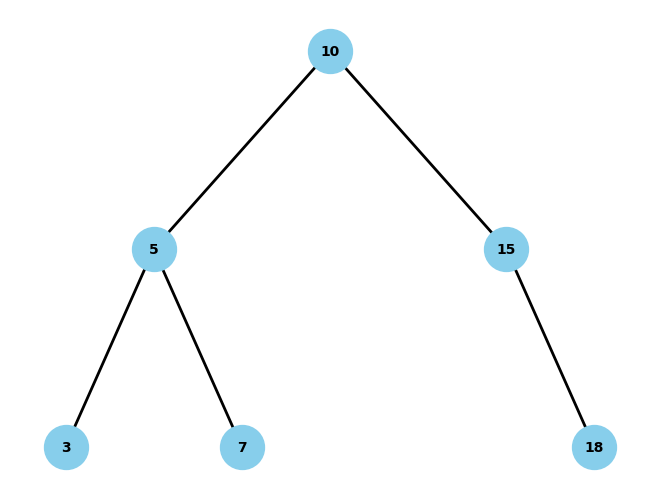

7


In [51]:
def kth_smallest_element(T, k):
        stack = []
        current = T.root()
        count = 0

        while stack or current:
            while current:
                stack.append(current)
                current = current.getLeft()

            current = stack.pop()
            count += 1

            if count == k:
                return current.getData().getData()  # Suponiendo que cada nodo tiene un campo "data"

            current = current.getRight()

        return None  # Si k es mayor que el número total de nodos en el árbol
        
# Ejemplo de uso
arbol = BinarySearchTree()
arbol.insert(10, 10)
arbol.insert(5, 5)
arbol.insert(15, 15)
arbol.insert(3, 3)
arbol.insert(7, 7)
arbol.insert(18, 18)
root = arbol.root()
draw_binary_search_tree(root)
print(kth_smallest_element(arbol, 3)) # 7

# Ejercicio 6
Retome el problema 5. de encontrar el k-ésimo elemento más pequeño de un árbol binario de búsqueda. Consulte cómo es posible aumentar un Árbol Red Black para que esta operación se pueda realizar eficientemente. (hint: aumentar quiere decir guardar información adicional en cada nodo sin que se afecte la eficiencia de las demás operaciones insertar, buscar y eliminar)

Para mejorar la eficiencia de la operación de encontrar el k-ésimo elemento más pequeño, podemos almacenar información adicional en cada nodo, como la cantidad de nodos en su subárbol izquierdo. Esto nos permitirá evitar recorrer todo el subárbol izquierdo cuando buscamos el k-ésimo elemento.
Esta modificación permite realizar la operación en tiempo O(log n), donde n es el número de nodos en el árbol. La información adicional en cada nodo no afecta las operaciones de insertar, buscar y eliminar, ya que solo se actualiza durante estas operaciones con un costo constante.

# Ejercicio 7
Recuerde que todo Árboles Red Black cumple cuatro requisitos: la raíz es negra, los nodos externos son negros, los hijos de un nodo rojo son negros y todos los nodos externos tienen la misma profundidad negra (Black Depth). Con esto en mente, resuelva:
- Considere la siguiente afirmación: "En un Árbol R B, el camino más largo desde la raíz hasta una hoja no es más largo que dos veces el camino más corto desde la raíz a una hoja". Piense, ¿por qué esta afirmación es verdadera?
- Consulte la prueba del siguiente Teorema: "Un arboles RED BLACK con 𝑛 nodos internos tiene una altura menor o igual a 2𝑙𝑛(𝑛+1)". (hint: Utilice la afirmación del punto anterior. Esta prueba no es difícil de entender y es interesante)

La afirmación de que en un Árbol Rojo-Negro (RB) el camino más largo desde la raíz hasta una hoja no es más largo que dos veces el camino más corto desde la raíz hasta una hoja se basa en el hecho de que todos los caminos desde la raíz hasta las hojas tienen la misma profundidad negra. Dado que todos los nodos externos (hojas) en un árbol RB tienen la misma profundidad negra, los caminos desde la raíz hasta cualquier hoja tienen la misma longitud en términos de nodos negros.

Ahora, para entender por qué el camino más largo no puede ser más largo que dos veces el camino más corto, consideremos un camino que sigue una secuencia de nodos rojos y negros. Dado que los nodos rojos siempre tienen padres negros, el camino más largo debe alternar entre nodos rojos y negros. Si consideramos un camino que alterna entre nodos rojos y negros, cada nodo negro en el camino representa dos nodos negros consecutivos en términos de profundidad negra.

Supongamos que el camino más largo desde la raíz hasta una hoja contiene k nodos negros (ya que alterna entre nodos rojos y negros). Dado que cada nodo negro en este camino representa dos nodos negros en términos de profundidad negra, el camino más corto desde la raíz hasta una hoja debe tener al menos k/2 nodos negros. Por lo tanto, el camino más largo no puede ser más largo que dos veces el camino más corto.

En cuanto al teorema mencionado ("Un árbol Rojo-Negro con 𝑛 nodos internos tiene una altura menor o igual a 2 𝑙𝑛 𝑛 1"), la prueba se basa en la afirmación anterior sobre la longitud de los caminos en un árbol RB. La altura de un árbol RB es la longitud del camino más largo desde la raíz hasta una hoja. Si un árbol tiene n nodos internos, el camino más largo desde la raíz hasta una hoja debe tener al menos log2(n+1) nodos negros en términos de profundidad negra. Usando la afirmación anterior, esto implica que la altura del árbol es menor o igual a 2 * log2(n+1), que se puede expresar como 2 * log2(n) + 2 - 2/log2(n+1). Esto finalmente se simplifica a 2 * log2(n) + O(1), lo que da como resultado la forma del teorema mencionado.

# Ejercicio 8
Un número feo es un número entero positivo cuyos factores primos son únicamente 2, 3 ó 5. Dado un número entero n, devuelva el n-ésimo número feo. (hint: utilice una MIN HEAP!)

In [52]:
import heapq

def nth_ugly_number(n):
    if n == 1:
        return 1
    
    heap = [1]
    seen = {1}
    factors = [2, 3, 5]

    for _ in range(n - 1):
        current = heapq.heappop(heap)

        for factor in factors:
            next_ugly = current * factor
            if next_ugly not in seen:
                seen.add(next_ugly)
                heapq.heappush(heap, next_ugly)

    return heapq.heappop(heap)

# Ejemplo de uso
n = 10
resultado = nth_ugly_number(n)
print(f"El {n}º número feo es: {resultado}")

El 10º número feo es: 12


# Ejercicio 9
Cómo se enseñó en clase, los Montículos se pueden implementar eficientemente con Arreglos. Sin embargo, los Montículos también se pueden ver como Árboles Binarios Semicompletos (todos los niveles con completos excepto posiblemente el último, el cual se llena de izquierda a derecha).
Al insertar un elemento se deben garantizar dos cosas:
1. Que se mantenga la estructura del montículo (árbol binario semicompleto).
2. Que se mantenga el orden del montículo (todo padre menor o igual que sus hijos o viceversa).

Para lograrlo es necesario realizar un proceso en dos pasos:
Paso 1: Agregar el nuevo elemento en el último nivel y a la derecha del más a la derecha o, si el último nivel está completo, como hijo izquierdo del más a la izquierda de ese nivel.
Paso 2: En caso de que se incumpla la propiedad de orden se deben reorganizar los elementos, “subiendo” el nuevo elemento por medio de intercambios hasta que quede en el lugar que le corresponde.
Viendo el Montículo como un Árbol Binario y no como un Arreglo, un algoritmo para el Paso 1 no es evidente. Considere el siguiente algoritmo para el Paso 1 y responda:
1. ¿Qué está haciendo el ciclo while (1)?
2. ¿Qué está haciendo el ciclo (2)? ¿Por qué funciona?
3. ¿Cuál es la eficiencia de este algoritmo?

Solución:
1. El ciclo while (1) está utilizando una representación binaria inversa del índice de los nodos del montículo. Es decir, si tenemos un montículo de 5 nodos (0 al 4), el índice en este algoritmo es el mismo pero considerando el orden inverso. Entonces, al ejecutar este ciclo, se genera una secuencia de números binarios que indica la posición de los nodos en el montículo.
2. El ciclo (2) se encarga de irse desplazando en el montículo hasta la posición correcta para insertar el nuevo nodo. Para ello, utiliza la secuencia de números binarios generada en el ciclo (1). Si el número binario es 0, entonces el nodo actual debe ir a la izquierda. Si el número binario es 1, entonces el nodo actual debe ir a la derecha. Esto se repite hasta que se encuentra la posición correcta para insertar el nuevo nodo. Funciona porque la secuencia de números binarios generada en el ciclo (1) indica la posición de los nodos en el montículo. Por lo tanto, al utilizar esta secuencia para desplazarse en el montículo, se encuentra la posición correcta para insertar el nuevo nodo.
3. La eficiencia de este algoritmo es O(log n), donde n es el tamaño del montículo. Esto se debe a que en cada iteración del ciclo (2), el nodo actual se desplaza aproximadamente a la mitad del montículo. Como se repite aproximadamente log n veces, la eficiencia es O(log n).

# Ejercicio 10
Dado un strings, ordénelo de forma decreciente en función de la frecuencia de los caracteres. La frecuencia de un carácter es el número de veces que aparece en el string. Devuelve la cadena ordenada. Si hay varias respuestas, devuelve cualquiera de ellas.
Por ejemplo, si la entrada es aaabbbbccdfffff la salida debería ser fffffbbbbaaacc d, pues f aparece 5 veces, b 4, a 3, c 2 y d 1. (De mayor a menor frecuencia y usando heapify y heappop)

In [57]:
def heapify(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify_down(arr, i, n)
        
def heapify_down(arr, i, n):
    while i < n:
        left = 2 * i + 1
        right = 2 * i + 2
        min = i
        if left < n and arr[left][0] < arr[min][0]:
            min = left
        if right < n and arr[right][0] < arr[min][0]:
            min = right
        if min == i:
            break
        arr[i], arr[min] = arr[min], arr[i]
        i = min
        
def heappop(arr):
    n = len(arr)
    arr[0], arr[n - 1] = arr[n - 1], arr[0]
    res = arr.pop()
    heapify_down(arr, 0, n - 1)
    return res

def frequencySort(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    heap = []
    for c in freq:
        heap.append((freq[c], c))
    heapify(heap)
    res = ""
    while len(heap) > 0:
        f, c = heappop(heap)
        res += c * f
    return res

def frequencySortInverse(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    heap = []
    for c in freq:
        heap.append((-freq[c], c))
    heapify(heap)
    res = ""
    while len(heap) > 0:
        f, c = heappop(heap)
        res += c * (-f)
    return res

# Ejemplo de uso
s = "aaabbbbccdfffff"
print(frequencySort(s)) # fffffbbbbaaaccd
print(frequencySortInverse(s)) # aacccfffffbbbb

dccaaabbbbfffff
fffffbbbbaaaccd


In [58]:
def frequencySort(s):
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    
    heap = []
    for c in freq:
        heapq.heappush(heap, (-freq[c], c))
    
    result = ""
    while heap:
        count, c = heapq.heappop(heap)
        result += c * (-count)
    
    return result

# Ejemplo de uso
s = "aaabbbbccdfffff"
print(frequencySort(s)) # fffffbbbbaaaccd

fffffbbbbaaaccd


# Ejercicio 11
Consulte sobre la estructura de datos Splay Tree, un Árbol binario de búsqueda auto balanceable, con la propiedad adicional de que a los elementos accedidos recientemente se accederá más rápidamente en accesos posteriores.

Splay Tree, que es un tipo de árbol binario de búsqueda auto balanceable con la propiedad adicional de "splay" que mejora el acceso a los elementos recientemente accedidos.

## Estructura del Splay Tree:

### Nodo:

Cada nodo tiene tres punteros: uno para el hijo izquierdo, uno para el hijo derecho y otro para el padre.
Además de la clave del nodo, puede contener información adicional según la aplicación.
Rotaciones Splay:

La operación básica en un Splay Tree es la operación de "splay". Cuando un nodo se accede, se realiza una secuencia de rotaciones para llevar ese nodo a la raíz del árbol.

Las rotaciones splay se dividen en tres tipos: Zig, Zig-Zig y Zig-Zag.

#### Zig:

A          B
 \   =>   /
  B      A
  
#### Zig-Zig:

A        C
 \  =>  / \
  B    B   A
   \  /
    C
    
#### Zig-Zag:

A        C
 \  =>  / \
  C    B   A
 /
B

### Operaciones Básicas:

- Búsqueda (Search): Cuando se busca un elemento, el nodo que contiene ese elemento se splay a la raíz.
- Inserción (Insert): Se inserta el nuevo elemento como en un árbol de búsqueda binario estándar y luego se realiza una operación de splay en el nuevo nodo.
- Eliminación (Delete): Se realiza la operación de splay en el nodo que se va a eliminar y luego se aplica la eliminación estándar.

#### Propiedad de Splay:

La propiedad principal del Splay Tree es que los elementos accedidos recientemente se mueven hacia la raíz del árbol durante las operaciones de búsqueda, inserción o eliminación.
Esto significa que los elementos recientemente utilizados están más cerca de la raíz, lo que mejora los tiempos de acceso para operaciones futuras.
Complejidad Temporal:

En el peor de los casos, la operación de splay tiene una complejidad de O(n), donde n es la altura del árbol. Sin embargo, en promedio, las operaciones son muy eficientes.

#### Aplicaciones:

Splay Trees se utilizan en situaciones donde se espera que ciertos elementos se accedan con mayor frecuencia que otros.